In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('UberDataset.csv')

In [ ]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
print(data.head())

         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
data.dropna(subset=['CATEGORY'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [ ]:
last_row = data.iloc[-1]
print(last_row)

START_DATE    12/31/2016 22:08
END_DATE      12/31/2016 23:51
CATEGORY              Business
START                  Gampaha
STOP                 Ilukwatta
MILES                     48.2
PURPOSE         Temporary Site
Name: 1154, dtype: object


In [ ]:
from dateutil.parser import parse

In [ ]:
data["START_DATE"] = data["START_DATE"].apply(lambda x: parse(x))
data["END_DATE"] = data["END_DATE"].apply(lambda x: parse(x))

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [ ]:
data['duration in minutes']=(data['END_DATE'] - data['START_DATE']).dt.total_seconds() / 60


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   START_DATE           1155 non-null   datetime64[ns]
 1   END_DATE             1155 non-null   datetime64[ns]
 2   CATEGORY             1155 non-null   object        
 3   START                1155 non-null   object        
 4   STOP                 1155 non-null   object        
 5   MILES                1155 non-null   float64       
 6   PURPOSE              653 non-null    object        
 7   duration in minutes  1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 81.2+ KB


In [ ]:
data['duration in minutes']

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Name: duration in minutes, Length: 1155, dtype: float64

In [ ]:
data['start day']=data['START_DATE'].dt.strftime('%A')
data['start day']

0          Friday
1        Saturday
2        Saturday
3         Tuesday
4       Wednesday
          ...    
1150     Saturday
1151     Saturday
1152     Saturday
1153     Saturday
1154     Saturday
Name: start day, Length: 1155, dtype: object

In [ ]:
print('data after cleaning')
data.info()

data after cleaning
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   START_DATE           1155 non-null   datetime64[ns]
 1   END_DATE             1155 non-null   datetime64[ns]
 2   CATEGORY             1155 non-null   object        
 3   START                1155 non-null   object        
 4   STOP                 1155 non-null   object        
 5   MILES                1155 non-null   float64       
 6   PURPOSE              653 non-null    object        
 7   duration in minutes  1155 non-null   float64       
 8   start day            1155 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 90.2+ KB


In [ ]:
print(data.head())

           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE  duration in minutes  start day  
0      Fort Pierce    5.1   Meal/Entertain                  6.0     Friday  
1      Fort Pierce    5.0              NaN                 12.0   Saturday  
2      Fort Pierce    4.8  Errand/Supplies                 13.0   Saturday  
3      Fort Pierce    4.7          Meeting                 14.0    Tuesday  
4  West Palm Beach   63.7   Customer Visit                 67.0  Wednesday  


In [ ]:
Average_duration=data['duration in minutes'].mean()
print('average trip duration =',Average_duration,'minute')
Average_miles=data['MILES'].mean()
print('average Miles =',Average_miles,'Mile')

average trip duration = 23.243290043290042 minute
average Miles = 10.566839826839827 Mile


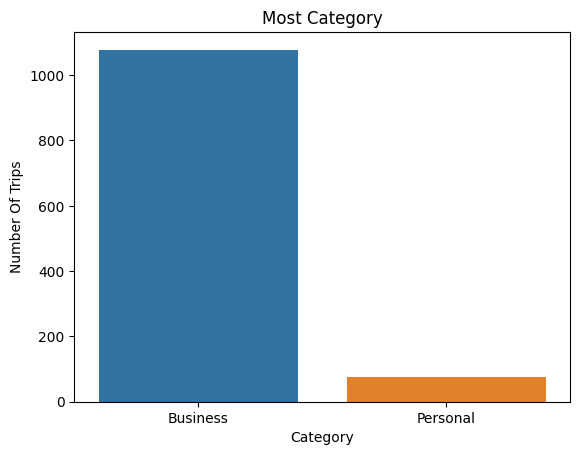

In [ ]:
sns.countplot(x='CATEGORY', data=data, order=data['CATEGORY'].value_counts().index)
plt.xlabel('Category')
plt.ylabel('Number Of Trips')
plt.title('Most Category')
plt.show()

In [ ]:
data['Month'] = data['START_DATE'].dt.month

<Figure size 1000x600 with 0 Axes>

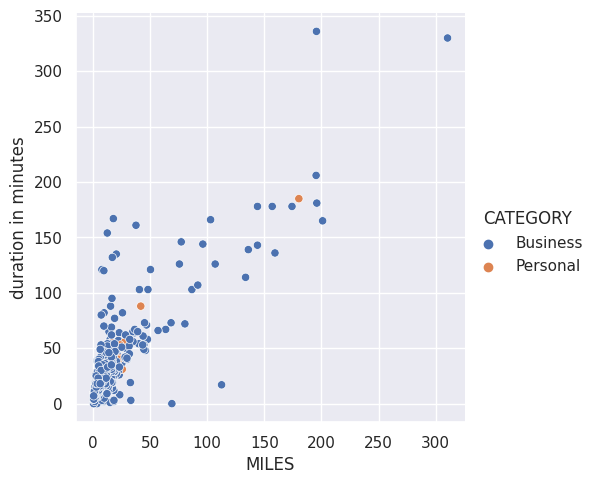

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.relplot(x=data['MILES'],y=data['duration in minutes'],hue=data['CATEGORY'])

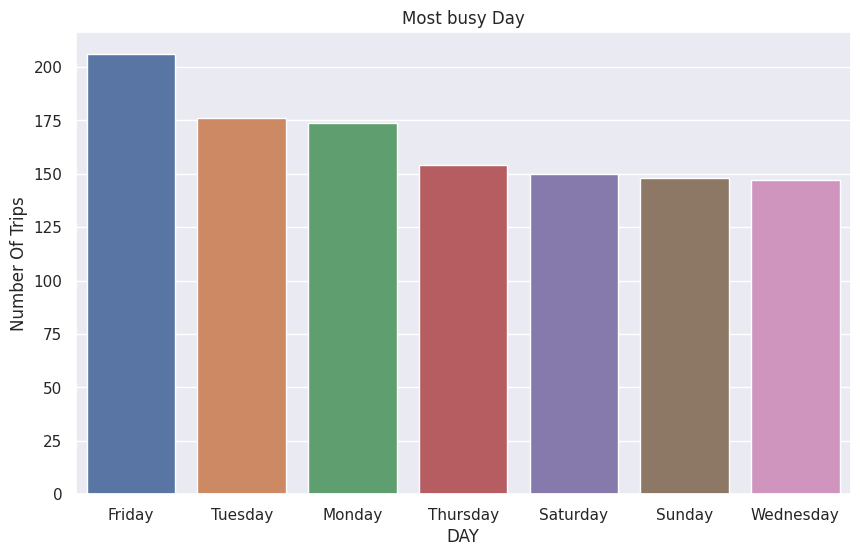

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='start day', data=data, order=data['start day'].value_counts().index)
plt.xlabel('DAY')
plt.ylabel('Number Of Trips')
plt.title('Most busy Day')
plt.show()

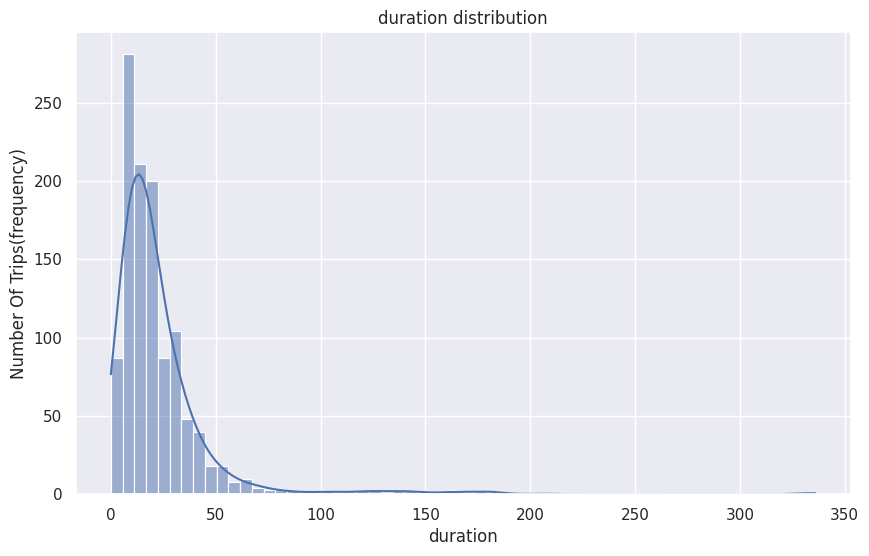

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['duration in minutes'], bins=60, kde=True)
plt.xlabel('duration')
plt.ylabel('Number Of Trips(frequency)')
plt.title('duration distribution')
plt.show()

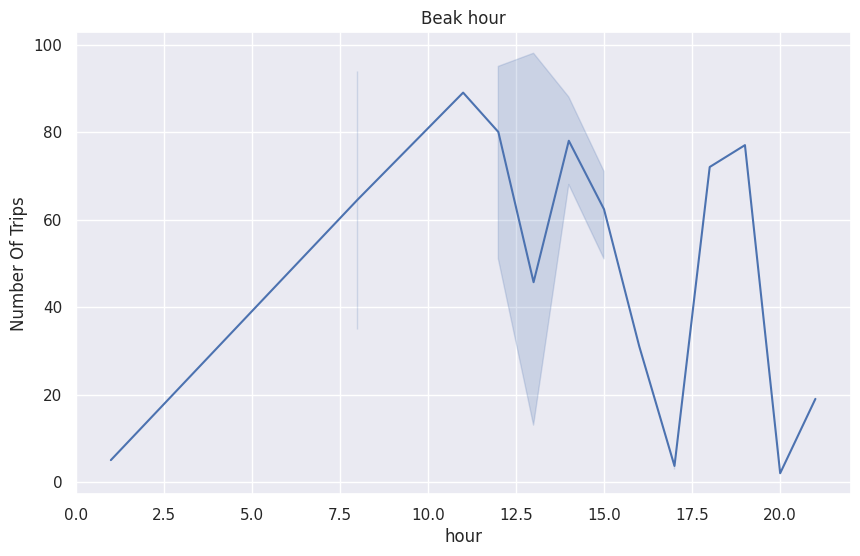

In [ ]:
data['hour'] = data['START_DATE'].dt.hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y=data['hour'].value_counts(), data=data)
plt.xlabel('hour')
plt.ylabel('Number Of Trips')
plt.title('Beak hour')
plt.show()

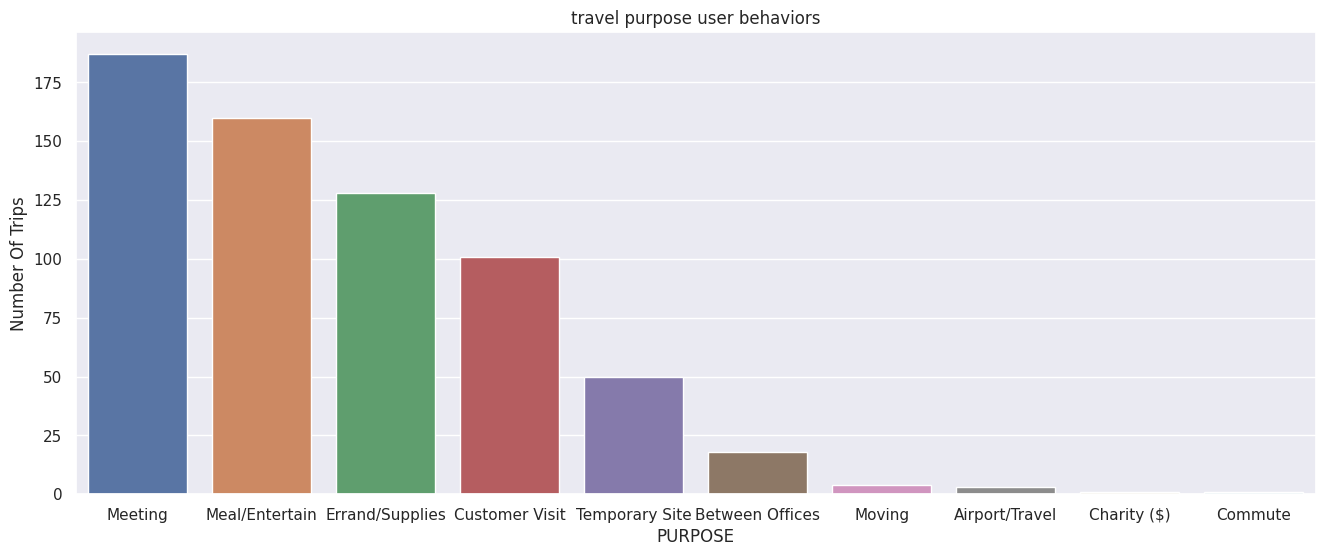

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(x='PURPOSE', data=data, order=data['PURPOSE'].value_counts().index)
plt.xlabel('PURPOSE')
plt.ylabel('Number Of Trips')
plt.title('travel purpose user behaviors')
plt.show()

# New Section